In [5]:
import numpy as np #linearna algebra
import pandas as pd #obrada podataka
import matplotlib.pyplot as plt #vizualizacija
import seaborn as sns #vizualizacija

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB, MultinomialNB, GaussianNB, CategoricalNB
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_validate
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
data = pd.read_csv('data/drug_train.csv', header=None);
data.columns = data.iloc[0]
data = data.drop(data.index[0])
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,23,F,HIGH,HIGH,25.355,DrugY
2,47,M,LOW,HIGH,13.093,drugC
3,47,M,LOW,HIGH,10.114,drugC
4,28,F,NORMAL,HIGH,7.798,drugX
5,61,F,LOW,HIGH,18.043,DrugY


In [7]:
data.info()
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          200 non-null    object
 1   Sex          200 non-null    object
 2   BP           200 non-null    object
 3   Cholesterol  200 non-null    object
 4   Na_to_K      200 non-null    object
 5   Drug         200 non-null    object
dtypes: object(6)
memory usage: 9.5+ KB
Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object', name=0)


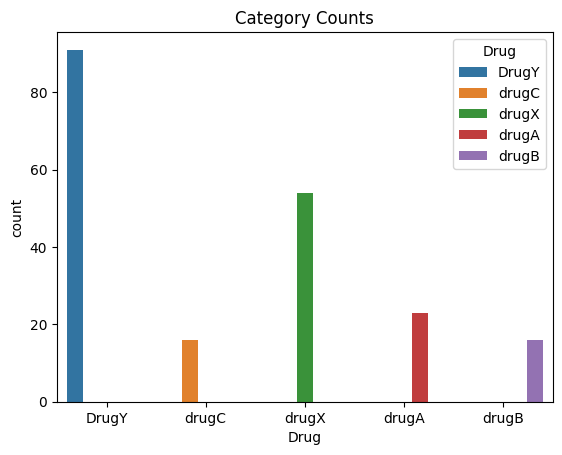

In [8]:
sns.countplot(x='Drug',data=data,hue='Drug')

plt.title("Category Counts")
plt.show()

In [9]:
for column in data.columns:
    if data[column].nunique() <= 10:
        print(f"column name: {column}, its unique values: {data[column].unique()}")

column name: Sex, its unique values: ['F' 'M']
column name: BP, its unique values: ['HIGH' 'LOW' 'NORMAL']
column name: Cholesterol, its unique values: ['HIGH' 'NORMAL']
column name: Drug, its unique values: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [10]:
# Change the string values of the columns to numbers
data['Sex'] = data['Sex'].replace({'F': 0, 'M': 1})
data['BP'] = data['BP'].replace({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
data['Cholesterol'] = data['Cholesterol'].replace({'HIGH': 1, 'NORMAL': 0})
data['Drug'] = data['Drug'].replace({'drugX': 0, 'DrugY': 1, 'drugA': 2, 'drugB': 3, 'drugC': 4})

In [11]:
y = data["Drug"]
X = data.drop(columns="Drug")

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=32)

In [13]:
def train_baseline_model(train, labels, model):
    mdl = model()
    mdl.fit(train, labels)
    return mdl

In [14]:
#ComplementNB
mul_bl_mdl = train_baseline_model(X_train, y_train, MultinomialNB)
print(f'MultinomialNB = {mul_bl_mdl.score(X_test,y_test)}')

MultinomialNB = 0.7166666666666667


In [15]:
#GaussianNB
Gau_md = train_baseline_model(X_train, y_train, GaussianNB)
print(f'GaussianNB = {Gau_md.score(X_test,y_test)}')

GaussianNB = 0.8


In [16]:
def cross_val(model, X_train, y_train, folds=10):
    scoring = {'acc': 'accuracy',
           'prec_micro': 'precision_micro',
           'rec_micro': 'recall_micro'}
    scores = cross_validate(model, X_train, y_train, scoring=scoring,
                         cv=folds, return_train_score=True)
    return scores

In [17]:
gas_cv_res = cross_val(Gau_md, X_test, y_test, 4)

display(gas_cv_res['test_acc'].mean())
display(gas_cv_res['test_prec_micro'].mean())
display(gas_cv_res['test_rec_micro'].mean())

0.7666666666666667

0.7666666666666667

0.7666666666666667

In [18]:
from matplotlib import pyplot

importance = cmp_bl_mdl.feature_log_prob_[0]
print(importance)
#plot with column names on x axis
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

NameError: name 'cmp_bl_mdl' is not defined